## import all relevant libraries

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import preprocessing

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [4]:
# To surpress all warnings
import warnings
warnings.filterwarnings("ignore")

## Load data from csv file, read data from csv file using dataframe

In [5]:
from os import path
fname = "projectData.csv"
df = pd.read_csv(fname)

## Basic information
print df.info()

In [6]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

## Inspect column names

In [7]:
print(df.columns.values)

['Customer' 'State' 'Customer Lifetime Value' 'Response' 'Coverage'
 'Education' 'Effective To Date' 'EmploymentStatus' 'Gender' 'Income'
 'Location Code' 'Marital Status' 'Monthly Premium Auto'
 'Months Since Last Claim' 'Months Since Policy Inception'
 'Number of Open Complaints' 'Number of Policies' 'Policy Type' 'Policy'
 'Renew Offer Type' 'Sales Channel' 'Total Claim Amount' 'Vehicle Class'
 'Vehicle Size']


## Inspect Data types

In [8]:
print(df.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


# Remove White Space characters from variable names

In [9]:
df.columns = df.columns.str.replace(' ', '')

## Convert the column EffectiveToDate to date

In [10]:
df['EffectiveToDate'] = df['EffectiveToDate'].astype('datetime64[ns]')

In [11]:
print(df.dtypes)

Customer                              object
State                                 object
CustomerLifetimeValue                float64
Response                              object
Coverage                              object
Education                             object
EffectiveToDate               datetime64[ns]
EmploymentStatus                      object
Gender                                object
Income                                 int64
LocationCode                          object
MaritalStatus                         object
MonthlyPremiumAuto                     int64
MonthsSinceLastClaim                   int64
MonthsSincePolicyInception             int64
NumberofOpenComplaints                 int64
NumberofPolicies                       int64
PolicyType                            object
Policy                                object
RenewOfferType                        object
SalesChannel                          object
TotalClaimAmount                     float64
VehicleCla

## Inspect the shape of the data

In [12]:
print(df.shape)

(9134, 24)


In [13]:
# first 5 rows
df.head()

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Inspect exploratory statistics 

In [14]:
print(df.describe())

       CustomerLifetimeValue        Income  MonthlyPremiumAuto  \
count            9134.000000   9134.000000         9134.000000   
mean             8004.940475  37657.380009           93.219291   
std              6870.967608  30379.904734           34.407967   
min              1898.007675      0.000000           61.000000   
25%              3994.251794      0.000000           68.000000   
50%              5780.182197  33889.500000           83.000000   
75%              8962.167041  62320.000000          109.000000   
max             83325.381190  99981.000000          298.000000   

       MonthsSinceLastClaim  MonthsSincePolicyInception  \
count           9134.000000                 9134.000000   
mean              15.097000                   48.064594   
std               10.073257                   27.905991   
min                0.000000                    0.000000   
25%                6.000000                   24.000000   
50%               14.000000                   48.00

## Replace all missing values
Inspect missing values in a dataset

In [15]:
print (df.isna().sum())

Customer                      0
State                         0
CustomerLifetimeValue         0
Response                      0
Coverage                      0
Education                     0
EffectiveToDate               0
EmploymentStatus              0
Gender                        0
Income                        0
LocationCode                  0
MaritalStatus                 0
MonthlyPremiumAuto            0
MonthsSinceLastClaim          0
MonthsSincePolicyInception    0
NumberofOpenComplaints        0
NumberofPolicies              0
PolicyType                    0
Policy                        0
RenewOfferType                0
SalesChannel                  0
TotalClaimAmount              0
VehicleClass                  0
VehicleSize                   0
dtype: int64


In [16]:
df.fillna(df.mean(), inplace=True)

## Convert all categorical values to numeric values 
use preprocessing.LabelEncoder()

In [17]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(df['State'])
df['State'] = labelEncoder.transform(df['State'])

labelEncoder.fit(df['Response'])
df['Response'] = labelEncoder.transform(df['Response'])

labelEncoder.fit(df['Coverage'])
df['Coverage'] = labelEncoder.transform(df['Coverage'])

labelEncoder.fit(df['Education'])
df['Education'] = labelEncoder.transform(df['Education'])

labelEncoder.fit(df['EffectiveToDate'])
df['EffectiveToDate'] = labelEncoder.transform(df['EffectiveToDate'])

labelEncoder.fit(df['EmploymentStatus'])
df['EmploymentStatus'] = labelEncoder.transform(df['EmploymentStatus'])

labelEncoder.fit(df['Gender'])
df['Gender'] = labelEncoder.transform(df['Gender'])

labelEncoder.fit(df['LocationCode'])
df['LocationCode'] = labelEncoder.transform(df['LocationCode'])

labelEncoder.fit(df['MaritalStatus'])
df['MaritalStatus'] = labelEncoder.transform(df['MaritalStatus'])

labelEncoder.fit(df['PolicyType'])
df['PolicyType'] = labelEncoder.transform(df['PolicyType'])

labelEncoder.fit(df['Policy'])
df['Policy'] = labelEncoder.transform(df['Policy'])

labelEncoder.fit(df['RenewOfferType'])
df['RenewOfferType'] = labelEncoder.transform(df['RenewOfferType'])

labelEncoder.fit(df['SalesChannel'])
df['SalesChannel'] = labelEncoder.transform(df['SalesChannel'])

labelEncoder.fit(df['VehicleClass'])
df['VehicleClass'] = labelEncoder.transform(df['VehicleClass'])

labelEncoder.fit(df['VehicleSize'])
df['VehicleSize'] = labelEncoder.transform(df['VehicleSize'])


## Inspect columns after convertion of categorical values to numeric values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                      9134 non-null object
State                         9134 non-null int64
CustomerLifetimeValue         9134 non-null float64
Response                      9134 non-null int64
Coverage                      9134 non-null int64
Education                     9134 non-null int64
EffectiveToDate               9134 non-null int64
EmploymentStatus              9134 non-null int64
Gender                        9134 non-null int64
Income                        9134 non-null int64
LocationCode                  9134 non-null int64
MaritalStatus                 9134 non-null int64
MonthlyPremiumAuto            9134 non-null int64
MonthsSinceLastClaim          9134 non-null int64
MonthsSincePolicyInception    9134 non-null int64
NumberofOpenComplaints        9134 non-null int64
NumberofPolicies              9134 non-null int64
PolicyType                    9134 non-n

In [19]:
df

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,4,2763.519279,0,0,0,54,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,QZ44356,0,6979.535903,0,1,0,30,4,0,0,...,42,0,8,1,5,2,0,1131.464935,0,1
2,AI49188,2,12887.431650,0,2,0,49,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,WW63253,1,7645.861827,0,0,0,19,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,HB64268,4,2813.692575,0,0,0,33,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1
5,OC83172,3,8256.297800,1,0,0,24,1,0,62902,...,94,0,2,1,5,1,3,159.383042,5,1
6,XZ87318,3,5380.898636,1,0,1,54,1,0,55350,...,13,0,9,0,2,0,0,321.600000,0,1
7,CF85061,0,7216.100311,0,2,4,17,4,1,0,...,68,0,4,0,2,0,0,363.029680,0,1
8,DY87989,3,24127.504020,1,0,0,25,2,1,14072,...,3,0,2,0,2,0,0,511.200000,0,1
9,BQ94931,3,7388.178085,0,1,1,47,1,0,28812,...,7,0,8,2,7,1,1,425.527834,0,1


## Plot a correlation matrix of all your variables.

In [20]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 30 , 20 ) )
    
    cmap = plt.cm.viridis
    
    _ = sns.heatmap(
        corr, 
        linewidths=0.1,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

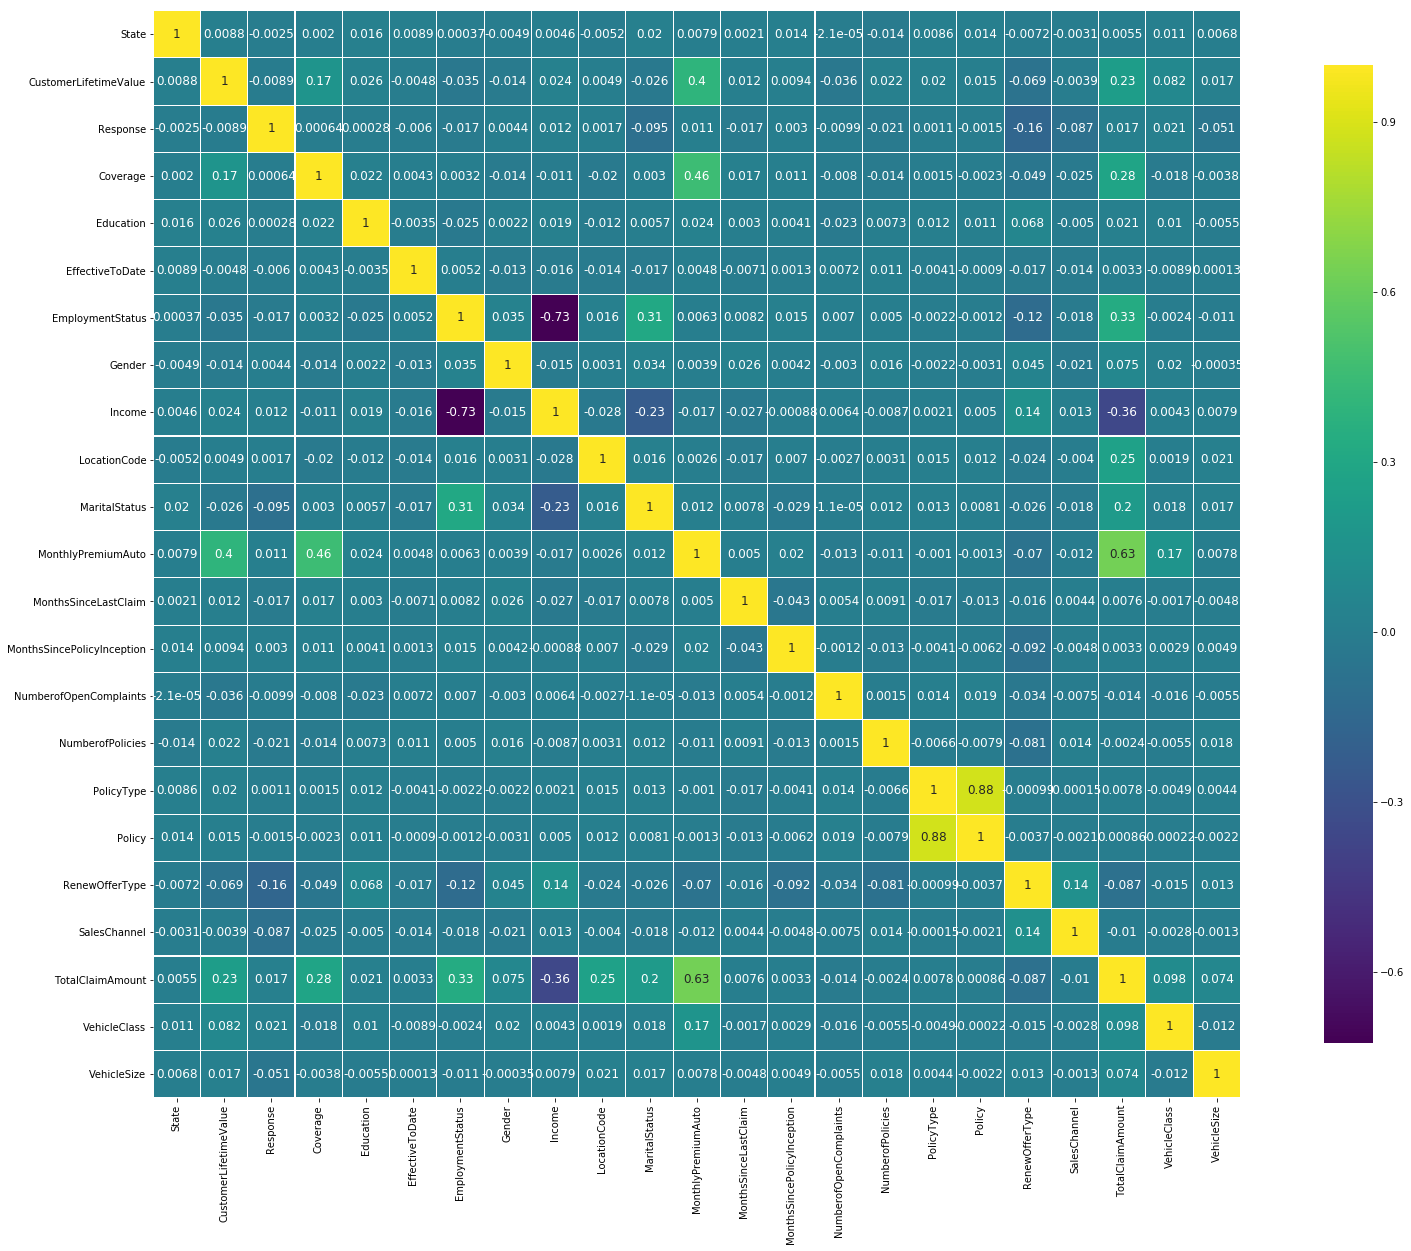

In [21]:
plot_correlation_map(df)

## Variables with strong or weak correlations.

Variables with strong correlations, are the ones which their correlation approches positive 1 or greator than 0.5
whereas those with weak correlations the value approches zero or less than 0.5

# Variables that are most useful for this experiment?

MonthlyPremiumAuto

TotalClaimAmount

Policy

PolicyType

Ensure the training dataset does not contain the column ['Customer']

In [22]:
X = df.iloc[:, 1:24]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                         9134 non-null int64
CustomerLifetimeValue         9134 non-null float64
Response                      9134 non-null int64
Coverage                      9134 non-null int64
Education                     9134 non-null int64
EffectiveToDate               9134 non-null int64
EmploymentStatus              9134 non-null int64
Gender                        9134 non-null int64
Income                        9134 non-null int64
LocationCode                  9134 non-null int64
MaritalStatus                 9134 non-null int64
MonthlyPremiumAuto            9134 non-null int64
MonthsSinceLastClaim          9134 non-null int64
MonthsSincePolicyInception    9134 non-null int64
NumberofOpenComplaints        9134 non-null int64
NumberofPolicies              9134 non-null int64
PolicyType                    9134 non-null int64
Policy                        9134 non-nu

In [24]:
y = df.iloc[:,20]
y

0       0
1       0
2       0
3       2
4       0
5       3
6       0
7       0
8       0
9       1
10      0
11      0
12      0
13      1
14      2
15      1
16      2
17      2
18      1
19      2
20      1
21      2
22      0
23      1
24      1
25      2
26      0
27      1
28      2
29      1
       ..
9104    0
9105    1
9106    0
9107    3
9108    0
9109    1
9110    0
9111    0
9112    0
9113    0
9114    1
9115    2
9116    0
9117    1
9118    0
9119    1
9120    3
9121    1
9122    1
9123    0
9124    0
9125    0
9126    1
9127    2
9128    1
9129    3
9130    1
9131    1
9132    1
9133    2
Name: SalesChannel, Length: 9134, dtype: int64

## Split the training/testing datasets 70/30 (X_train=4930, X_test=2113)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [26]:
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(6393, 23)
(6393L,)
(2741, 23)
(2741L,)


## Building a DecisionTreeClassifier

## 
Plot the learning curve for the DecisionTreeClassifier (use all the data).

http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

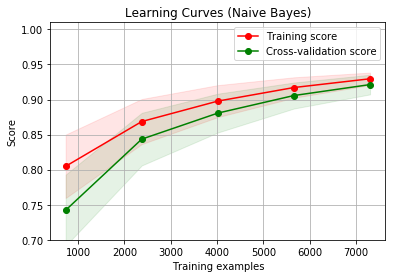

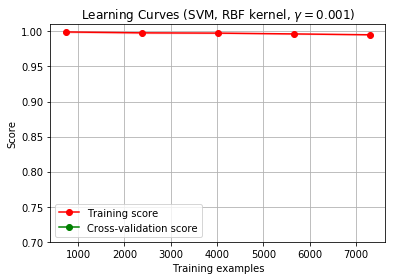

In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [28]:
print 'Class labels:', np.unique(y_train)
print 'Labels counts in y_train:', np.bincount(y_train)
print 'Labels counts in y_test :', np.bincount(y_test)

Class labels: [0 1 2 3]
Labels counts in y_train: [2445 1761 1261  926]
Labels counts in y_test : [1032  806  504  399]


In [29]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

In [30]:
clf_entropy.fit(X_train, y_train) 
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [31]:
clf_entropy.score(X_train, y_train)

1.0

## Finding the best accuracy, cross validation

In [32]:
accuracies = list()
depth_range = range(1, 15)

for depth in depth_range:
    
    tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)
    
    model = tree_model.fit(X_train, y_train)
    #score = tree_model.score(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    output = 'CV accuracy: %.8f +/- %.3f' % (np.mean(scores), np.std(scores))

    accuracies.append(output)

    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "CV Accuracy": accuracies})
df = df[["Max Depth", "CV Accuracy"]]
print(df.to_string(index=False))

Max Depth                        CV Accuracy
        1  CV accuracy: 0.65790767 +/- 0.000
        2  CV accuracy: 0.85515478 +/- 0.001
        3  CV accuracy: 1.00000000 +/- 0.000
        4  CV accuracy: 1.00000000 +/- 0.000
        5  CV accuracy: 1.00000000 +/- 0.000
        6  CV accuracy: 1.00000000 +/- 0.000
        7  CV accuracy: 1.00000000 +/- 0.000
        8  CV accuracy: 1.00000000 +/- 0.000
        9  CV accuracy: 1.00000000 +/- 0.000
       10  CV accuracy: 1.00000000 +/- 0.000
       11  CV accuracy: 1.00000000 +/- 0.000
       12  CV accuracy: 1.00000000 +/- 0.000
       13  CV accuracy: 1.00000000 +/- 0.000
       14  CV accuracy: 1.00000000 +/- 0.000


The best max_depth parameter seems therefore to be around 3 (1.00000000 average accuracy across the 10 folds)

In [33]:
acc_decision_tree = round(clf_entropy.score(X_train, y_train) * 100, 8)
acc_decision_tree

100.0

## Build a RandomForestClassifier:

## Tuning hyperparameters (GridSearchCV)
GridSearchCV()

In [34]:
def log(x):
    #can be used to write to log file
    print(x)

# Utility function to report best scores (from scikit-learn.org)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            log("Model with rank: {0}".format(i))
            log("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            log("Parameters: {0}".format(results['params'][candidate]))
            log("")

# Function to determine the best fit (from scikit-learn.org)
def best_fit(rfc, X_train, y_train):
    
    # use a full grid over all parameters for RandomForestClassifier
    param_grid = {"max_depth": [3, None],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "criterion": ["gini", "entropy"],
                  "bootstrap": [True, False],
                  "max_features":[1,3,10],
                 }

    # run grid search
    grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3)

    import time as ttt
    now = time()
    log(ttt.ctime())
    
    grid_search.fit(X_train, y_train)
    
    report(grid_search.cv_results_, n_top=10)
    
    log(100*"-")
    log(ttt.ctime())
    log("Search (3-fold cross validation) took %.5f seconds for %d candidate parameter settings." 
        % (time() - now, len(grid_search.cv_results_['params'])))
    log('')
    log("The best parameters are %s with a score of %0.5f"
        % (grid_search.best_params_, grid_search.best_score_))
    
    return grid_search

In [35]:
rfc = RandomForestClassifier(random_state=1)
best_tree = best_fit(rfc, X_train, y_train)

Sat Nov 17 20:35:01 2018
Model with rank: 1
Mean validation score: 1.00000 (std: 0.00000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 10, 'max_depth': 3}

Model with rank: 1
Mean validation score: 1.00000 (std: 0.00000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 10, 'max_depth': 3}

Model with rank: 1
Mean validation score: 1.00000 (std: 0.00000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 10, 'criterion': 'gini', 'max_features': 10, 'max_depth': 3}

Model with rank: 1
Mean validation score: 1.00000 (std: 0.00000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 10, 'max_depth': 3}

Model with rank: 1
Mean validation score: 1.00000 (std: 0.00000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'gini', '

## Re-train the classifier using the optimal parameters.

In [36]:
def log(x):
    #can be used to write to log file
    print(x)

# Utility function to report best scores (from scikit-learn.org)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            log("Model with rank: {0}".format(i))
            log("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            log("Parameters: {0}".format(results['params'][candidate]))
            log("")

# Function to determine the best fit (from scikit-learn.org)
def best_fit(rfc, X_train, y_train):
    
    # use a full grid over all parameters for RandomForestClassifier
    param_grid = {"max_depth": [None],
                  "min_samples_split": [2],
                  "min_samples_leaf": [3],
                  "criterion": ["gini", "entropy"],
                  "bootstrap": [False],
                  "max_features":[3],
                 }

    # run grid search
    grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3)

    import time as ttt
    now = time()
    log(ttt.ctime())
    
    grid_search.fit(X_train, y_train)
    
    report(grid_search.cv_results_, n_top=10)
    
    log(100*"-")
    log(ttt.ctime())
    log("Search (3-fold cross validation) took %.5f seconds for %d candidate parameter settings." 
        % (time() - now, len(grid_search.cv_results_['params'])))
    log('')
    log("The best parameters are %s with a score of %0.5f"
        % (grid_search.best_params_, grid_search.best_score_))
    
    return grid_search

In [37]:
rfc = RandomForestClassifier(random_state=1)
best_tree = best_fit(rfc, X_train, y_train)

Sat Nov 17 20:35:44 2018
Model with rank: 1
Mean validation score: 0.97669 (std: 0.00311)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.96872 (std: 0.01419)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}

----------------------------------------------------------------------------------------------------
Sat Nov 17 20:35:45 2018
Search (3-fold cross validation) took 0.70800 seconds for 2 candidate parameter settings.

The best parameters are {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None} with a score of 0.97669


## With evidence, show which top 5 features that the most importance. Also plot the feature importance

Feature ranking:
1. feature 19 (0.757394)
2. feature 20 (0.025645)
3. feature 1 (0.024052)
4. feature 13 (0.021602)
5. feature 8 (0.020241)
6. feature 11 (0.019234)
7. feature 5 (0.018877)
8. feature 12 (0.017397)
9. feature 4 (0.009979)
10. feature 15 (0.009445)
11. feature 0 (0.009205)
12. feature 18 (0.008624)
13. feature 17 (0.008063)
14. feature 21 (0.007272)
15. feature 22 (0.006246)
16. feature 10 (0.005600)
17. feature 3 (0.005374)
18. feature 14 (0.005087)
19. feature 9 (0.004846)
20. feature 6 (0.004649)
21. feature 2 (0.004226)
22. feature 7 (0.003702)
23. feature 16 (0.003240)


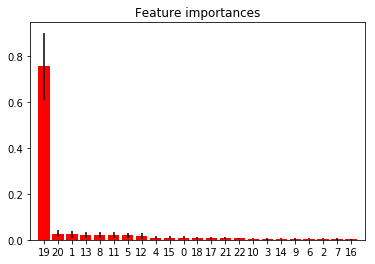

In [38]:

rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [39]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [40]:
feature_importances

,importance
SalesChannel,0.757394
TotalClaimAmount,0.025645
CustomerLifetimeValue,0.024052
MonthsSincePolicyInception,0.021602
Income,0.020241
MonthlyPremiumAuto,0.019234
EffectiveToDate,0.018877
MonthsSinceLastClaim,0.017397
Education,0.009979
NumberofPolicies,0.009445


## The top five most features important are

SalesChannel<br/>
TotalClaimAmount<br/>
CustomerLifetimeValue<br/>
MonthsSincePolicyInception<br/>
Income<br/>

## Use 10-fold cross validation and provide the evaluation metrics.

In [41]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(best_tree, X_train, y_train, scoring=scoring, return_train_score=False, cv=10)

In [42]:
fit_time = list(scores['fit_time'])
score_time = list(scores['score_time'])
accuracy = list(scores['test_accuracy'])
recall = list(scores['test_recall_macro'])
precision = list(scores['test_precision_macro'])
f1 = list(scores['test_f1_macro'])

In [43]:
print ('------------------------------------------------------------')
print ('N-FOLD CROSS VALIDATION RESULT ')
print ('------------------------------------------------------------')
print ('n-fold fit_time: %0.9f ' % (np.sum(fit_time)))
print ('n-fold score_time: %0.9f ' % (np.sum(score_time)))
print ('------------------------------------------------------------')
print ('n-fold average accuracy: %0.9f (+/- %0.9f)' % (np.mean(accuracy)*100, np.std(accuracy) * 2))
print ('n-fold average recall: %0.9f (+/- %0.9f)' % (np.mean(recall)*100, np.std(recall) * 2))
print ('n-fold average precision: %0.9f (+/- %0.9f)' % (np.mean(precision)*100, np.std(precision) * 2))
print ('n-fold average f1: %0.9f (+/- %0.9f)' % (np.mean(f1)*100, np.std(f1) * 2))

------------------------------------------------------------
N-FOLD CROSS VALIDATION RESULT 
------------------------------------------------------------
n-fold fit_time: 6.753999949 
n-fold score_time: 0.099000216 
------------------------------------------------------------
n-fold average accuracy: 97.716150489 (+/- 0.014481728)
n-fold average recall: 96.416149839 (+/- 0.024111371)
n-fold average precision: 97.203398475 (+/- 0.018434910)
n-fold average f1: 96.733420082 (+/- 0.022121850)


## Use both the DecisionTreeClassifier and RandomForestClassifier and make some predictions:

## <br/> 
Prediction for DecisionTreeClassifier

In [44]:
score = clf_entropy.score(X_train, y_train)

print('Accuracy (training model): %.8f' % score) # 0.98095238

predictions = clf_entropy.predict(X_test)

Accuracy (training model): 1.00000000


In [45]:
print('Classification report:')
print(classification_report(y_test, predictions, digits=4))

Classification report:
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000      1032
          1     1.0000    1.0000    1.0000       806
          2     1.0000    1.0000    1.0000       504
          3     1.0000    1.0000    1.0000       399

avg / total     1.0000    1.0000    1.0000      2741



In [46]:
print('Misclassified samples (predicting): %d' % (y_test != predictions).sum())

Misclassified samples (predicting): 0


## <br/> 
Prediction for RandomForestClassifier

In [47]:
score = rfc.score(X_train, y_train)

print('Accuracy (training model): %.8f' % score) # 0.98095238

predictions_rfc = rfc.predict(X_test)

Accuracy (training model): 1.00000000


In [48]:
print('Classification report:')
print(classification_report(y_test, predictions, digits=4))

Classification report:
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000      1032
          1     1.0000    1.0000    1.0000       806
          2     1.0000    1.0000    1.0000       504
          3     1.0000    1.0000    1.0000       399

avg / total     1.0000    1.0000    1.0000      2741



In [49]:
print('Misclassified samples (predicting): %d' % (y_test != predictions_rfc).sum())

Misclassified samples (predicting): 17


## Which model (classifier) was the most accurate?

Which model (classifier) was the most accurate? 

DecisionTree is the most accurate

## Why do you think that is? Explain.

1. Accuracy score for DecisionTreeClassifier is: 1.00000, while for RandomForestClassifier is 1.00000, RandomForestClassifier has a higher score than DecisionTreeClassifier. 
2. The number of misclassified samples for DecisionTreeClassifier (0) is lower than that of RandomForestClassifier (17)

In [50]:
from sklearn.tree import export_graphviz
from subprocess import check_call

In [51]:
features = X_train.columns.values

nFeatures = []

for feature in features:
    nFeatures.append(feature)

In [52]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [53]:
export_graphviz(clf_entropy, 
                filled=True,
                rounded=True,
                out_file='best-tree.dot',
                feature_names= nFeatures)

In [54]:
#Convert .dot to .png to allow display in web notebook

check_call(['C:\\graphviz-2.38\\bin\\dot','-Tpng','best-tree.dot','-o','best-tree.png'])

0

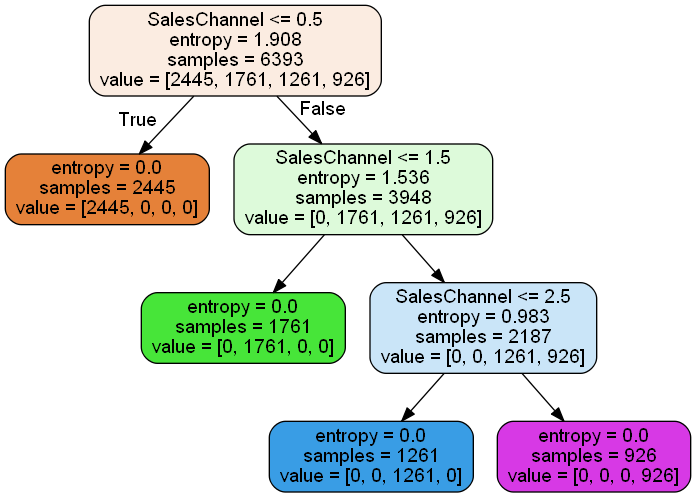

In [55]:
from IPython.display import Image
Image(filename='best-tree.png')

## Build an unsupervised learning classifier

In [56]:
def calc_rows_and_cols(number_of_figures):
    num_cols = num_rows = 1
    if number_of_figures > 1:
        num_cols = 2
        num_rows = (number_of_figures/num_cols) + (1 if number_of_figures % num_cols > 0 else 0)
    return num_rows,num_cols

def get_axis(axes, index, number_of_figures, num_rows, num_cols):
    axis = None
    if number_of_figures == 1:
        axis = axes
    elif num_rows == 1:
        axis = axes[index]
    else:
        axis = axes[index / num_cols, index % num_cols]
    return axis

def plot_clusters(axis,data,k,labels,centroids,alpha=None):
    for i in range(k):
        ds = data[np.where(labels==i)]
        dots = axis.plot(ds[:,0],ds[:,1],'o')
        xs = axis.plot(centroids[i,0],centroids[i,1],'kx')
        pl.setp(xs,ms=15.0)
        pl.setp(xs,mew=2.0)
        if alpha:
            pl.setp(dots,alpha=alpha)
            pl.setp(xs,alpha=alpha)

## Numpy arrays

In [57]:
# Scikit-learn uses numpy arrays, so make sure you format your data accordingly, and is extremely easy to use.
data = np.array(X_train)

## Lets just plot the data (without clusters)

In [58]:
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
%time kmeans_model = KMeans(n_clusters=5, random_state=1)

# Get only the numeric columns from xtrain.
good_columns = X_train._get_numeric_data()

# Fit the model using the good columns.
%time kmeans_model.fit(good_columns)

Wall time: 1 ms
Wall time: 309 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [59]:
# Get the cluster assignments.
labels = kmeans_model.labels_
print labels[0:18]

[4 4 0 0 1 1 4 4 1 1 4 4 3 4 1 4 2 2]


In [60]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)

# Fit the PCA model on the numeric columns from earlier.
# good_columns = the numeric columns from games.
%time plot_columns = pca_2.fit_transform(good_columns)

Wall time: 70 ms


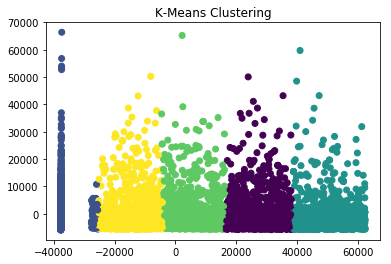

In [61]:
# Make a scatter plot of each game, shaded according to cluster assignment.
fig = plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)

ax.set_title('K-Means Clustering')

# Show the plot.
plt.show()